Text(0.5, 1.0, 'Star mass function of satellite')

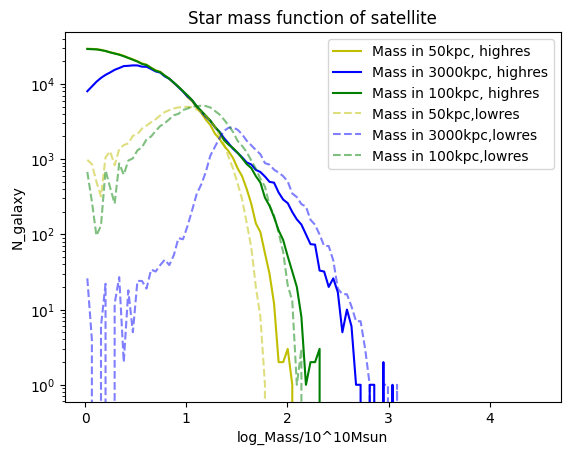

In [2]:
import h5py
import numpy as np
import unyt
import swiftsimio as sw
from swiftsimio import load
import swiftgalaxy as sg
import functions as fn
from matplotlib import colors
import matplotlib.pyplot as plt

path="/Users/24756376/data/Flamingo/L1000N1800/"

f=h5py.File(path+'halos.hdf5','r')
ms=np.array(f["halos"]["mass_star_100kpc"])
ms50=np.array(f["halos"]["mass_star_50kpc"])
ms300=np.array(f["halos"]["mass_star_300kpc"])
ms3000=np.array(f["halos"]["mass_star_1000kpc"])
host_id=np.array(f["halos"]["hostid"])
f.close()
path="/Users/24756376/data/Flamingo/L1000N0900/"

f=h5py.File(path+'halos.hdf5','r')
ms2=np.array(f["halos"]["mass_star_100kpc"])
ms502=np.array(f["halos"]["mass_star_50kpc"])
ms3002=np.array(f["halos"]["mass_star_300kpc"])
ms30002=np.array(f["halos"]["mass_star_1000kpc"])
host_id2=np.array(f["halos"]["hostid"])
f.close()


bin50,mf50=fn.massfunction(ms50[host_id!=-1])
fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.plot(bin50,mf50,'y',label="Mass in 50kpc, highres")
ax.set_yscale('log')
bin3000,mf3000=fn.massfunction(ms3000[host_id!=-1])
ax.plot(bin3000,mf3000,'b',label="Mass in 3000kpc, highres")
bin300,mf300=fn.massfunction(ms[host_id!=-1])
ax.plot(bin300,mf300,'g',label="Mass in 100kpc, highres")
ax.legend()

bin502,mf502=fn.massfunction(ms502[host_id2!=-1])

ax.plot(bin502,mf502,'y',linestyle="dashed",label="Mass in 50kpc,lowres",alpha=0.5)

bin30002,mf30002=fn.massfunction(ms30002[host_id2!=-1])
ax.plot(bin30002,mf30002,'b',linestyle="dashed",label="Mass in 3000kpc,lowres",alpha=0.5)
bin3002,mf3002=fn.massfunction(ms2[host_id2!=-1])
ax.plot(bin3002,mf3002,'g',linestyle="dashed",label="Mass in 100kpc,lowres",alpha=0.5)
ax.legend()
ax.set_xlabel("log_Mass/10^10Msun")
ax.set_ylabel("N_galaxy")
ax.set_title("Star mass function of satellite")
